<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_Data_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data and Models in Machine Learning**



## **1. Representing Objects as Vectors**

Machine learning models cannot "see" objects; they can only process numerical attributes associated with those objects. Feature extraction is the process of selecting which attributes to measure. Once selected, these attributes form a "Feature Vector." A collection of these vectors forms the Design Matrix.

Imagine you are a chef categorizing different soups. You cannot feed the soup itself into a computer. Instead, you taste it and record specific numbers:

- Saltiness (grams per liter)

- Viscosity (thickness, 1-10 scale)

- Temperature (Celsius)

If you have a Tomato Soup with values [2.5, 4, 65] and a Gazpacho with values [3.0, 6, 4], you have converted the culinary reality of soup into vectors. If you write these on a chalkboard, one below the other, you have created a Design Matrix. The computer now understands "soup" as a coordinate in 3D space.

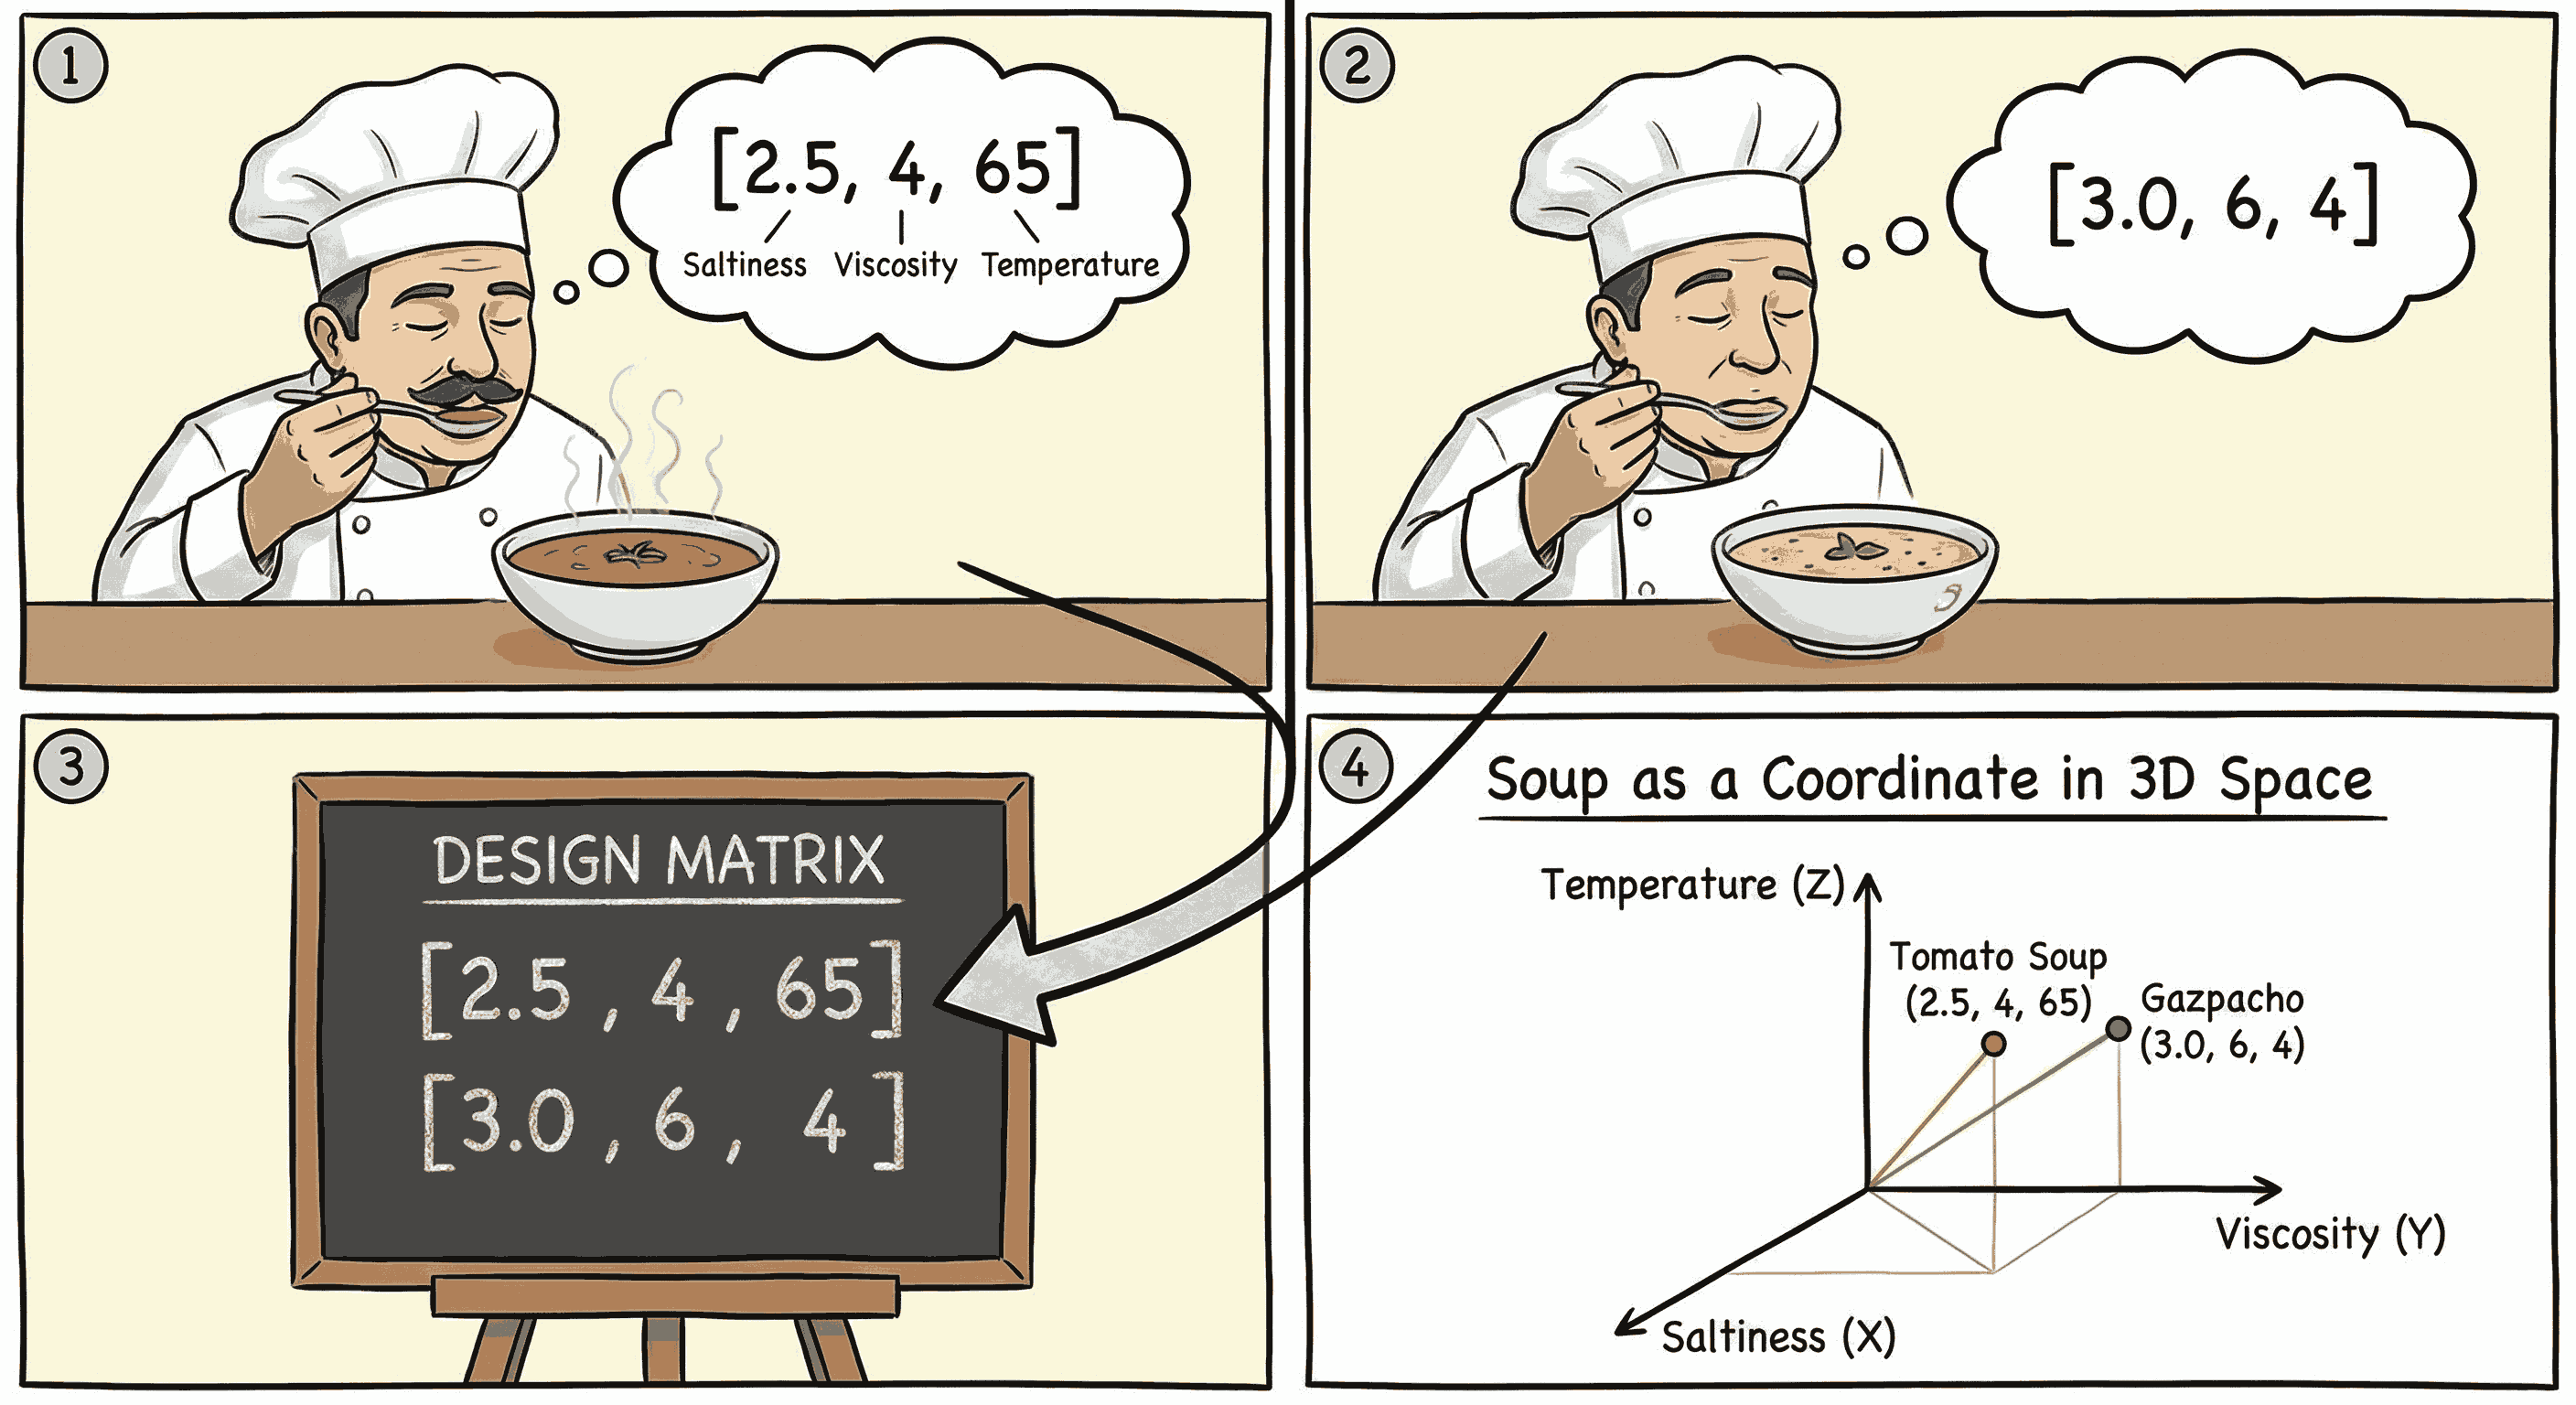

In [ ]:
import numpy as np

# Scenario: We are modeling "Smartphones".
# We choose 3 features:
# 1. Screen Size (inches)
# 2. Battery Life (hours)
# 3. Price (hundreds of dollars)

# Phone 1: 6.1 inch, 18 hours, $800 (8.0)
phone_1 = np.array([6.1, 18.0, 8.0])

# Phone 2: 5.4 inch, 15 hours, $700 (7.0)
phone_2 = np.array([5.4, 15.0, 7.0])

# Phone 3: 6.7 inch, 22 hours, $1100 (11.0)
phone_3 = np.array([6.7, 22.0, 11.0])

# Creating the Design Matrix X
# We stack the vectors vertically.
# Shape will be (N=3 samples, D=3 features)
X_phones = np.vstack([phone_1, phone_2, phone_3])

print("Feature Vector for Phone 1:", phone_1)
print("\nDesign Matrix X:\n", X_phones)
print("\nShape of X:", X_phones.shape)
# Output should indicate (3, 3)

Feature Vector for Phone 1: [ 6.1 18.   8. ]

Design Matrix X:
 [[ 6.1 18.   8. ]
 [ 5.4 15.   7. ]
 [ 6.7 22.  11. ]]

Shape of X: (3, 3)


## Task 1.1: Real Estate Properties

1. Create a dataset representing "Real Estate Properties."
2. Define 4 properties.
3. Select 3 features: ``.
4. Create NumPy vectors for each property with realistic values.
5. Stack them into a design matrix variable named X_real_estate.
6. Print the matrix and its dimensions using .shape.

In [ ]:
#WRITE CODE HERE

## **2. Linear Function, Linear Model and Implementation**


A linear model computes a weighted sum of inputs plus a bias (intercept). In vector notation, this is the dot product of the parameter vector $\boldsymbol{\theta}$ and the input vector $\boldsymbol{x}$. The bias is often handled by appending a "1" to the input vector, allowing the entire operation to be a single dot product.

Consider a simple model for taxi fare.
- The Bias ($\theta_0$): This is the base fare. It costs \$3.00 just to step into the cab. Even if distance is 0, the cost is 3.00.
- The Weight ($\theta_1$): This is the rate per mile. Say, \$2.00 per mile.
- The Input ($x$): The distance traveled.

If you travel 5 miles:$$\text{Cost} = \text{Base} + (\text{Rate} \times \text{Distance})$$$$\text{Cost} = 3.00 + (2.00 \times 5) = 13.00$$Mathematically, we treat the input as x (the 1 represents the base condition) and the parameters as [3.00, 2.00]. The calculation is a dot product.

In [ ]:
def linear_predict(x, theta):
    """
    Computes y = theta. x
    x: Input vector (D dimensions)
    theta: Parameter vector (D dimensions)
    """
    # The dot product sums the products of corresponding elements
    return np.dot(theta, x)

# Example: Taxi Ride
# Parameters theta:
theta_taxi = np.array([3.0, 2.0, 0.5])

# Input x:
# Note: We always add '1.0' as the first element to multiply with the Base Fare.
ride_A = np.array([1.0, 10.0, 25.0]) # 10 miles, 25 minutes

cost = linear_predict(ride_A, theta_taxi)

print(f"Parameters: {theta_taxi}")
print(f"Input Features: {ride_A}")
print(f"Predicted Cost: ${cost:.2f}")
# Calculation check: 3*1 + 2*10 + 0.5*25 = 3 + 20 + 12.5 = 35.5

Parameters: [3.  2.  0.5]
Input Features: [ 1. 10. 25.]
Predicted Cost: $35.50


## Task 2.1 Student Grades

Implement a linear model to predict the grade of a student.

1. Define an input vector x_student for a student who studied 8 hours and slept 6 hours. Remember to prepend a 1.0 for the bias.

2. Define a parameter vector theta_grade.
    - Base Score (Bias): 40 points.
    - Points per Study Hour: 5 points.
    - Points per Sleep Hour: 2 points.

3. Use np.dot to calculate the predicted grade.

4. Print the inputs, parameters, and final prediction.

## **3. Empirical Risk Minimization**

How do we define a "good" model?

In machine learning, we quantify "badness" using a Loss Function, denoted as $\ell(y_n, \hat{y}_n)$.

This function measures the penalty for predicting $\hat{y}_n$ when the true label is $y_n$.
- Squared Loss (Regression): $\ell(y, \hat{y}) = (y - \hat{y})^2$. Small errors are tolerated, but large errors are penalized quadratically.
- 0-1 Loss (Classification): Returns 0 if correct, 1 if incorrect.  

The ultimate goal is to minimize the True Risk ($R_{true}$), which is the expected loss over all possible data points the universe could ever generate.$$R_{true}(\boldsymbol{\theta}) = \mathbb{E}_{x,y} [\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))]$$However, we cannot compute this expectation because we do not have access to the infinite universe of data. We only have our finite training set $\mathcal{D}$. Therefore, we minimize the Empirical Risk ($R_{emp}$), which is the average loss on the training data:

**3.1 Overfitting and Regularization**

A model can "cheat" by memorizing the training data. Imagine a student who memorizes the answer key to a practice exam without understanding the subject. They will achieve 0% error on the practice exam (Empirical Risk = 0) but will fail the real exam (True Risk = High). This is called Overfitting.

To prevent this, we introduce Regularization. We add a penalty term to our objective function that discourages the model from becoming too complex or having extremely large parameter values.$$\min_{\boldsymbol{\theta}} R_{emp}(\boldsymbol{\theta}) + \lambda \|\boldsymbol{\theta}\|^2$$This formulation seeks a compromise: fit the data well, but keep the solution simple.

**The Squared Error Loss**

In regression, the most common metric for performance is the Mean Squared Error (MSE). It represents the Empirical Risk when using the Squared Loss function. By squaring the error, we ensure that positive and negative errors don't cancel each other out, and we place a higher penalty on outliers.

You are throwing darts at a board. We want to measure your accuracy.
1. Throw 1: You miss by 2 cm.
2. Throw 2: You miss by -2 cm (2 cm to the left).

If we just averaged the errors, $(2 + (-2)) / 2 = 0$. This would imply you are a perfect player, which is false!

Instead, we square the errors: $2^2 = 4$ and $(-2)^2 = 4$. The average is $4$. This "4" is your Risk. To improve, you must get closer to the center.

In [ ]:
import numpy as np
def compute_empirical_risk_mse(y_true, y_pred):
    """
    Computes Empirical Risk using Mean Squared Error (MSE)
    y_true: Vector of actual labels
    y_pred: Vector of model predictions
    """
    # 1. Compute the difference (residuals)
    residuals = y_true - y_pred

    # 2. Square the residuals
    squared_errors = residuals ** 2

    # 3. Compute the average (Empirical Risk)
    risk = np.mean(squared_errors)

    return risk

# Example Data
# True house prices (in millions)
y_actual = np.array([1.5, 2.0, 1.2, 3.5])

# Prediction Model A (A mediocre model)
y_model_a = np.array([1.4, 2.2, 1.0, 3.0])

# Prediction Model B (A better model)
y_model_b = np.array([1.5, 2.0, 1.2, 3.4])

risk_a = compute_empirical_risk_mse(y_actual, y_model_a)
risk_b = compute_empirical_risk_mse(y_actual, y_model_b)

print(f"Risk for Model A: {risk_a:.4f}")
print(f"Risk for Model B: {risk_b:.4f}")
# Model B should have lower risk (closer to 0).

Risk for Model A: 0.0850
Risk for Model B: 0.0025


## Task 3.1 :

Calculate the risk for a "Temperature Predictor."

1. Create y_true_temp = [...].

2. Create y_pred_temp = [...].

3. Compute the Mean Squared Error using the logic above (don't just use a library function; write the steps to square and average).

4. Print the result.

In [ ]:
#WRITE CODE HERE

**3.2 Grid Search for Parameter Estimation**

Now that we can calculate risk, how do we find the parameter $\theta$ that minimizes it? One simple (brute-force) method is Grid Search. We define a range of possible values for $\theta$, calculate the risk for each, and pick the best one. This helps visual the "Loss Landscape."

You are trying to tune a radio to a specific station, but the dial is unmarked. You want to find the spot with the clearest sound (minimum static noise).

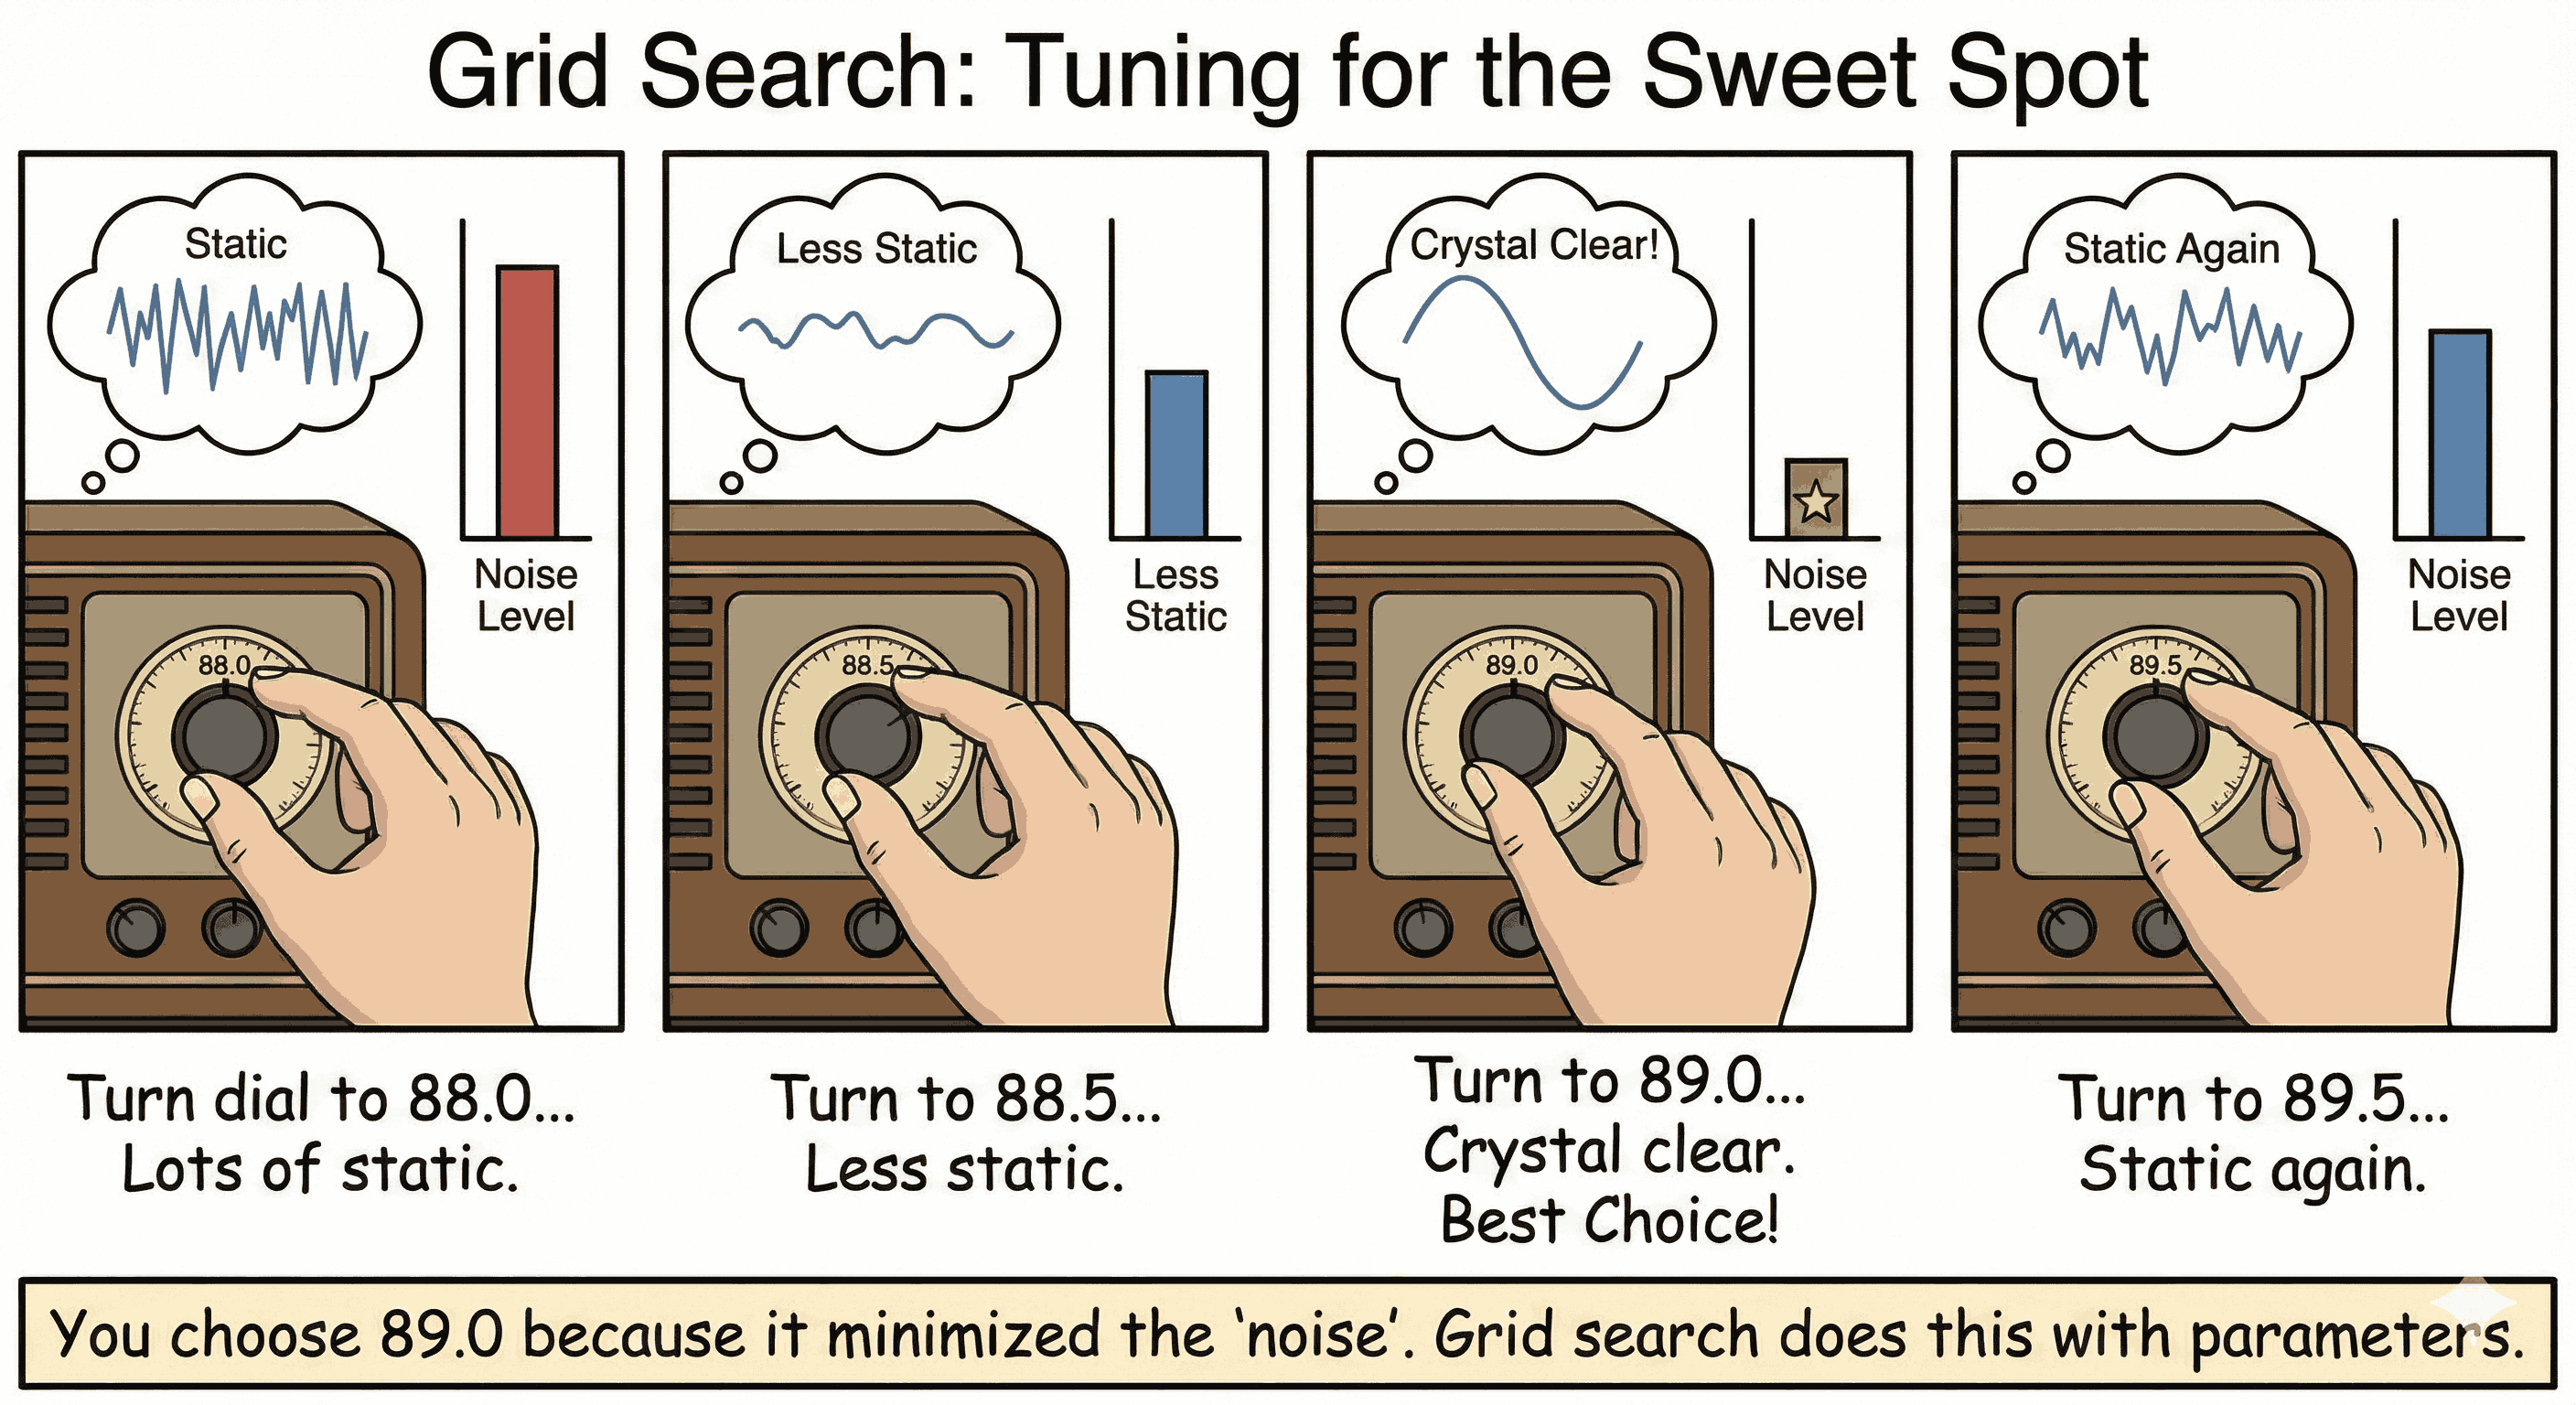

In [ ]:
import matplotlib.pyplot as plt

# 1. Create a synthetic dataset
# The "Truth": y = 3.5 * x
x_data = np.array([1,2,3,4,5])
y_data = np.array([3.5, 7.0, 10.5, 14.0, 17.5])

# 2. Define the "Grid" of parameters to test
# We suspect the slope is between 0 and 6.
candidate_thetas = np.linspace(0, 6, 100) # Test 100 different values

risks =[]

# 3. Iterate through every candidate
for theta in candidate_thetas:
    # Make prediction using this candidate theta
    # Model: y = theta * x (Simple linear model, no bias for simplicity)
    y_pred = theta * x_data

    # Calculate Risk
    risk = compute_empirical_risk_mse(y_data, y_pred)
    risks.append(risk)

# 4. Find the minimum risk
min_risk_index = np.argmin(risks)
best_theta = candidate_thetas[min_risk_index]

print(f"Best Theta found: {best_theta:.2f}")

Best Theta found: 3.52


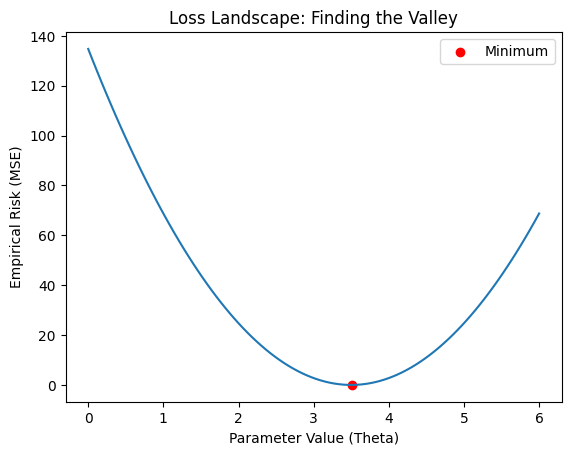

In [ ]:
# Visualization of the "Loss Landscape"
plt.plot(candidate_thetas, risks)
plt.scatter(best_theta, risks[min_risk_index], color='red', label='Minimum')
plt.xlabel("Parameter Value (Theta)")
plt.ylabel("Empirical Risk (MSE)")
plt.title("Loss Landscape: Finding the Valley")
plt.legend()
plt.show()

## Task 3.2 : Perform a grid search to find the best Intercept (Bias) for a dataset.

1. Dataset:
    - x = ,
    - y = . *(The slope appears to be 1, but the intercept is unknown).*

2. Assume the model is y = 1.0 * x + bias.

3. Create a grid of candidate biases from 0 to 20.

4. Loop through them, calculating the MSE for each.

5. Print the bias that results in the lowest error.

## **4. Parameter Estimation (Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP))**

**4.1 Simulating Likelihood (Coin Toss)**

The simplest probabilistic model is the Bernoulli distribution (coin flip). It has one parameter $\mu$ (probability of heads). We will generate data using a "secret" $\mu$, and then try to recover that $\mu$ using MLE.

Imagine a "loaded" die. You suspect it rolls '6' more often than it should. You cannot see the weight inside (the parameter). You can only roll it 100 times (generate data) and count the 6s. If you get 60 sixes, your best guess (MLE) for the probability of rolling a 6 is 0.60.

In [ ]:
# 1. The Generative Process (The "Secret")
true_mu = 0.75 # The coin is biased to land Heads 75% of the time.

# 2. Generating Data (The Experiment)
# We flip the coin 50 times.
N_flips = 50
# np.random.binomial(n=1, p, size) simulates Bernoulli trials
data_flips = np.random.binomial(n=1, p=true_mu, size=N_flips)

print("Observed Data (1=Heads, 0=Tails):")
print(data_flips)

# 3. Maximum Likelihood Estimation
# For Bernoulli, the MLE is simply the sample mean (percentage of heads).
estimated_mu_mle = np.mean(data_flips)

print(f"\nTrue Parameter: {true_mu}")
print(f"MLE Estimate:   {estimated_mu_mle}")
# Note: The estimate will likely not be exactly 0.75 due to randomness.

Observed Data (1=Heads, 0=Tails):
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 1]

True Parameter: 0.75
MLE Estimate:   0.72


## Task 4.1

1. Simulate a "Website Conversion Rate" estimator.

2. Set a hidden parameter true_conversion_rate = 0.12 (12% of visitors buy).

3. Simulate N_visitors = 500. (Use np.random.binomial).

4. Calculate the MLE estimate of the conversion rate from the data.

5. Print the difference between the true rate and the estimated rate.

In [ ]:
#WRITE CODE HERE

**4.2 Implementing a Prior (MAP)**

We will use a Beta distribution as a prior for the coin flip parameter $\mu$, but for simplicity in this code, we will implement it as "virtual data." Adding a prior that expects a fair coin is mathematically equivalent to adding some "virtual" heads and tails to our dataset before calculating the mean.

Imagine you are playing cards with a stranger.
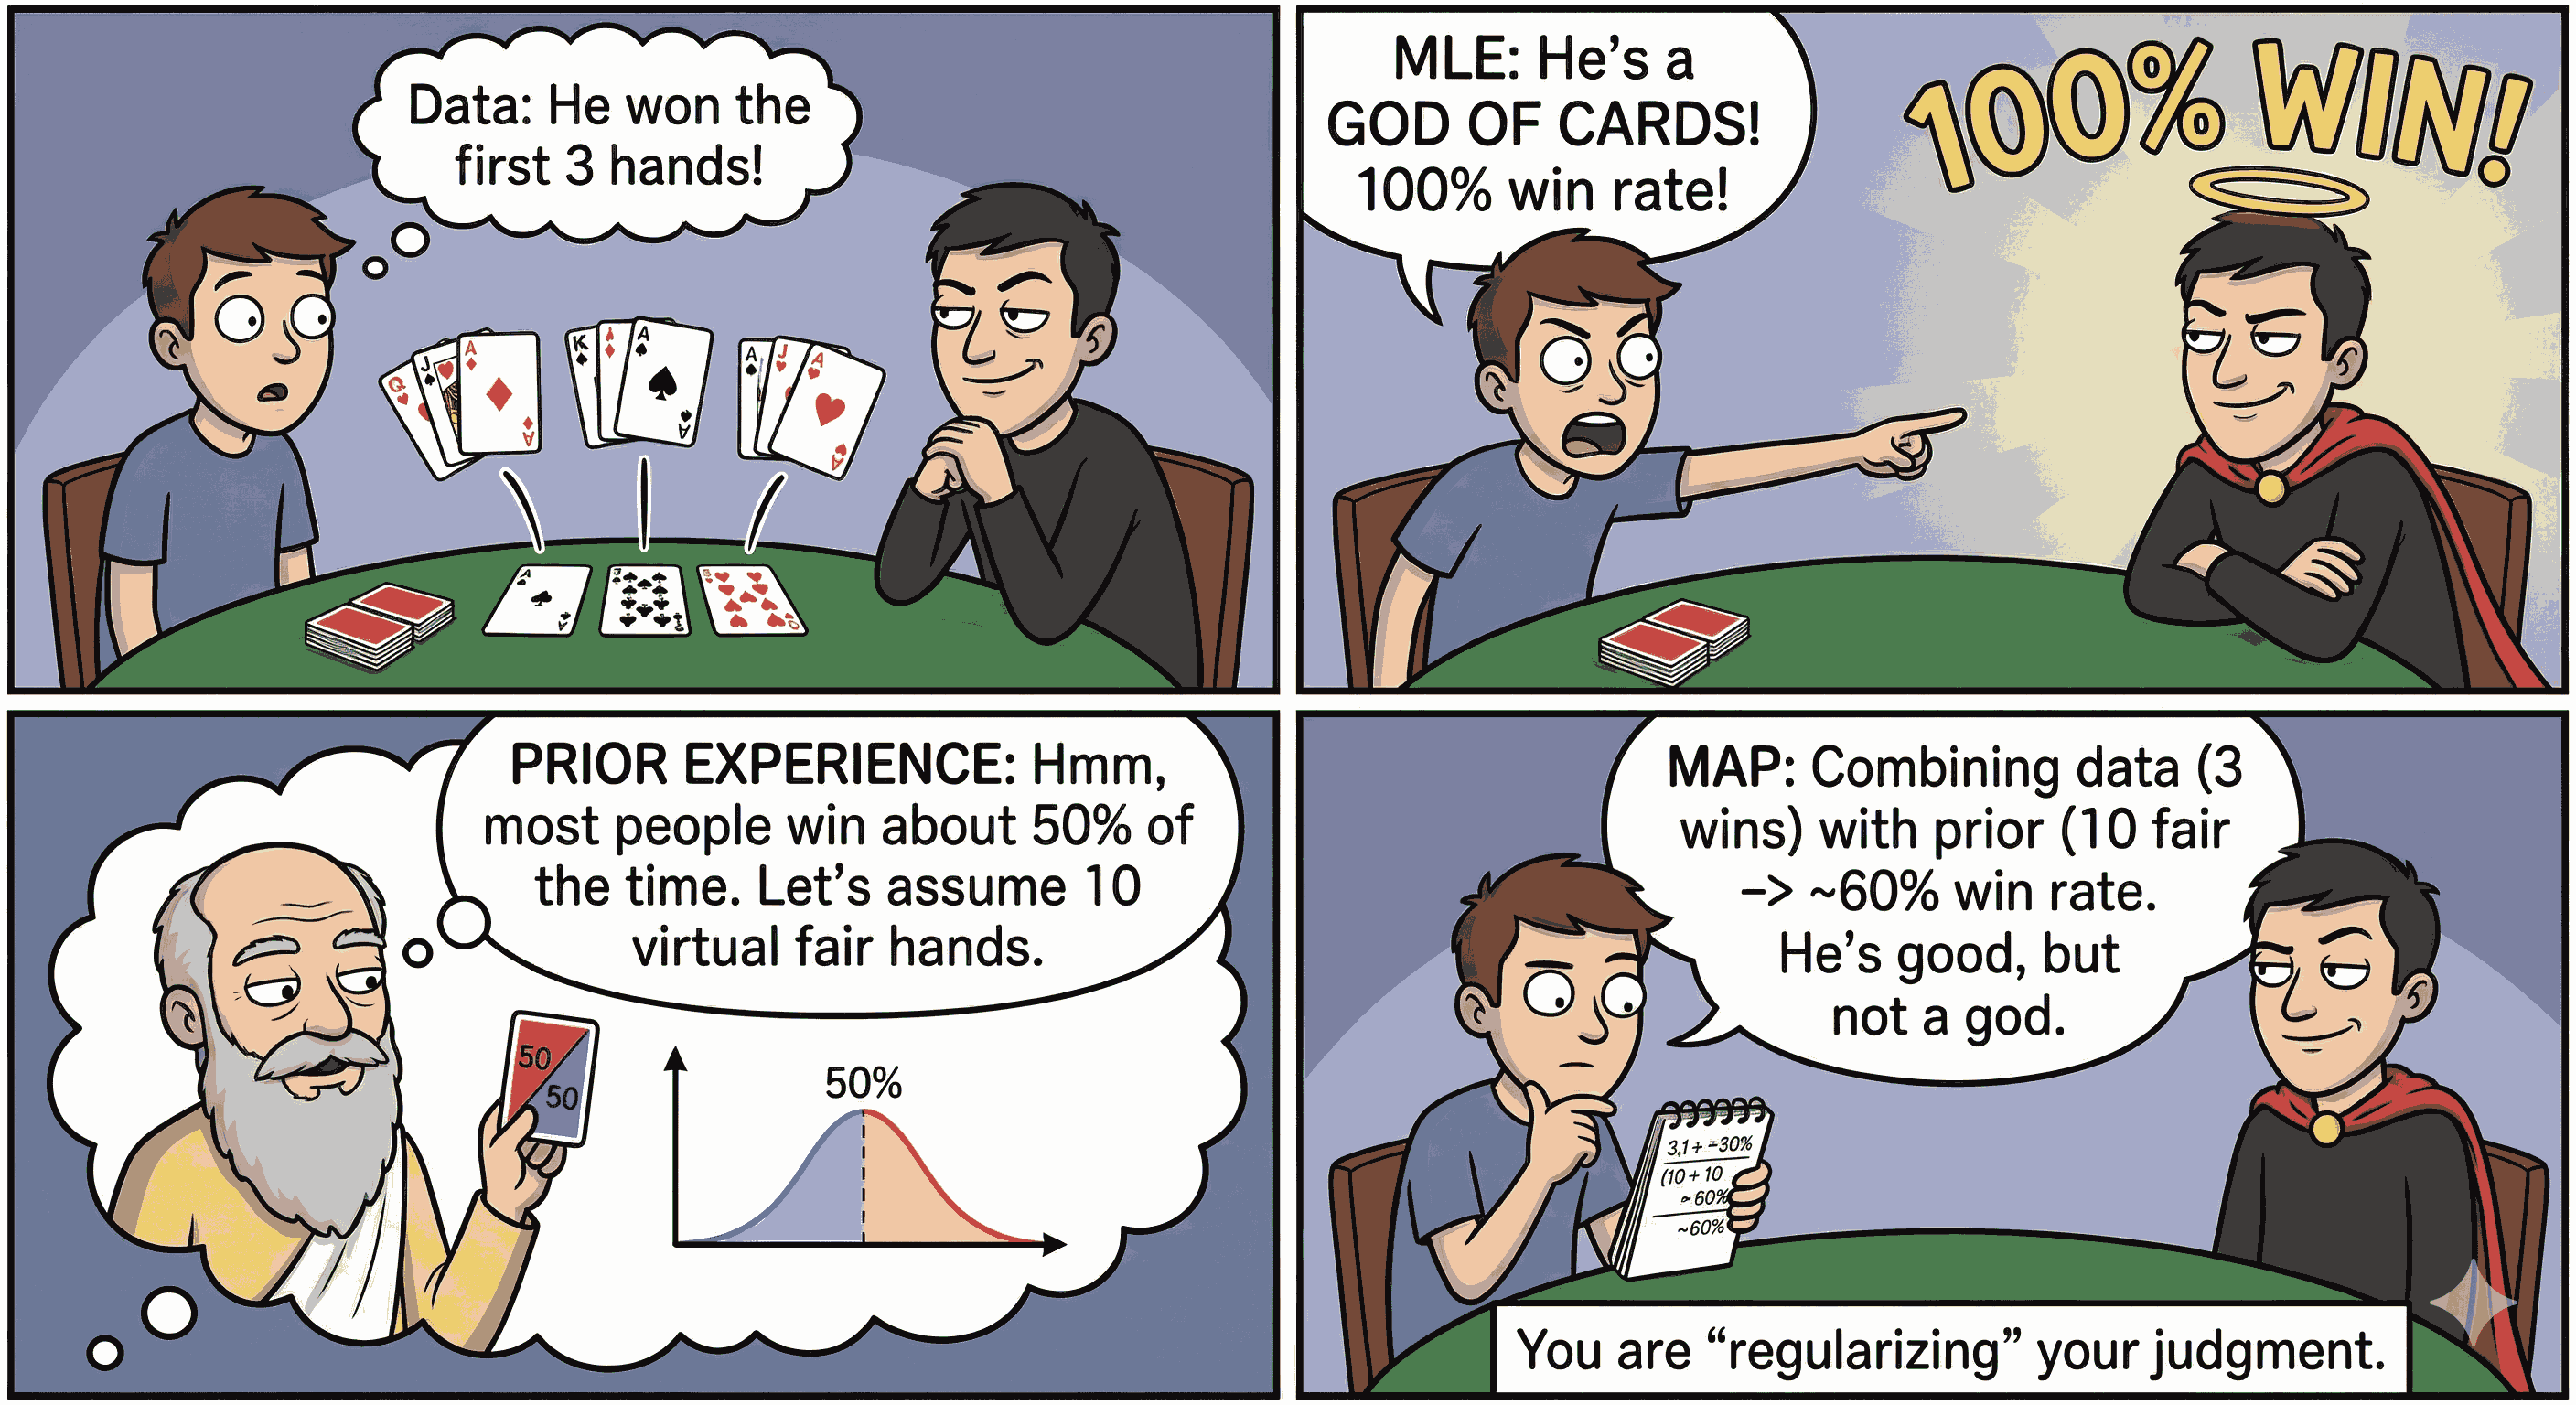

In [ ]:
# Scenario: Small data sample
# We flip a coin 5 times and get 5 Heads.
data_small = np.array([1,1,1,1,1])

# MLE Estimate
mu_mle = np.mean(data_small)
print(f"MLE (Data only): {mu_mle}")
# Result is 1.0. We incorrectly believe Tails is impossible.

# MAP Estimate (Adding a Prior)
# Our Prior: We believe the coin is likely fair.
# We represent this by adding "pseudo-counts"
# alpha = 2 (virtual heads), beta = 2 (virtual tails)
alpha_prior = 2
beta_prior = 2

num_heads = np.sum(data_small)
num_total = len(data_small)

# The formula for MAP with Beta prior is (heads + alpha - 1) / (total + alpha + beta - 2)
# A simplified view is just adding counts:
mu_map = (num_heads + alpha_prior) / (num_total + alpha_prior + beta_prior)

print(f"MAP (Data + Prior): {mu_map:.2f}")
# Result is 7/9 = 0.77.
# We still think the coin is biased, but we no longer think Tails is impossible.

MLE (Data only): 1.0
MAP (Data + Prior): 0.78


#Task 4.2

You run a factory.

1. Data: You test 3 products, and 0 are defective. (data = [0,0,0]).

2. MLE: Calculate the MLE probability of a defect. (It will be 0.0).

3. MAP: You know from history that defects do happen. Add a prior equivalent to seeing 1 defective item and 9 non-defective items in the past.

4. Calculate the MAP estimate. (It should be non-zero).

In [ ]:
#WRITE CODE HERE

## **5. Probabilistic Modeling and Inference**

**5.1 Generative Process**

A probabilistic model is essentially a story about how data is created. We call this the Generative Process. To understand a dataset, we try to reverse-engineer this process.

Example: Linear Regression as a Generative Process.
1. Pick a random input $\boldsymbol{x}$.
2. Compute the "true" value $\boldsymbol{\theta}^\top \boldsymbol{x}$.
3. Add random Gaussian noise $\epsilon$.
4. Output $y = \boldsymbol{\theta}^\top \boldsymbol{x} + \epsilon$.

By defining this story mathematically, we can write down the likelihood and solve for $\boldsymbol{\theta}$.

**5.2 Latent Variables**

Sometimes, the data generation involves steps we cannot see. These invisible steps are controlled by Latent Variables, often denoted as $\boldsymbol{z}$.

Example: Gaussian Mixture Models (Chapter 11).

Imagine measuring the height of people. The distribution looks like two humps (bimodal).
- Latent Variable $z$: The gender of the person (Hidden/Unrecorded).
- Observed Variable $x$: The height.

The generative story is:
1. Flip a coin (weighted by gender ratio) to choose $z$ (Male/Female).
2. Sample height $x$ from the specific Gaussian distribution corresponding to $z$.Inference involves figuring out $z$ (Gender) given only $x$ (Height). This requires marginalizing (summing) over the possibilities of $z$.

**5.3 Bayesian Inference**

In Section 4.2, we used MAP to find the single best parameter set. Bayesian Inference goes further. Instead of finding a single value for $\boldsymbol{\theta}$, we want to calculate the full Posterior Distribution $p(\boldsymbol{\theta} | X, Y)$.

We don't want to say "The parameter is 5."

We want to say "The parameter is likely around 5, with a variance of 0.5."

This allows us to quantify Uncertainty. When we make a prediction for a new point $x_{new}$, we average the predictions of all possible parameters, weighted by their probability. This is robust but computationally expensive.

To understand generative models, we will build one. We will create a synthetic dataset where the data comes from two different "clusters" (Latent Variable).

Imagine a factory with two machines.

- Machine A produces items weighing 100g on average.

- Machine B produces items weighing 150g on average.
The "Latent Variable" is which machine made the item. The "Observed Variable" is the weight. We will simulate this factory.

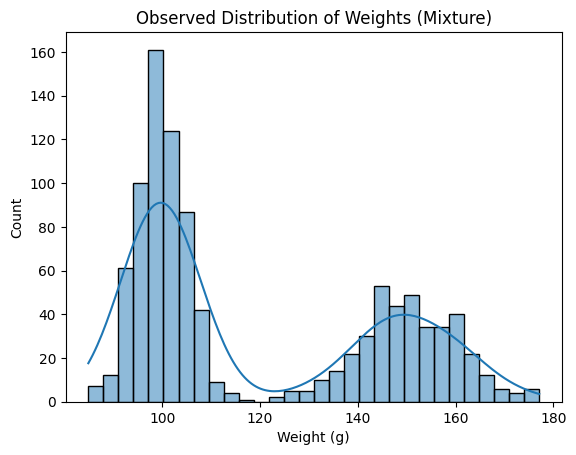

In [ ]:
import seaborn as sns

# 1. Setup Parameters
# Machine A parameters
mu_A = 100
sigma_A = 5

# Machine B parameters
mu_B = 150
sigma_B = 10

# Mixing probability (Latent Variable distribution)
# 60% of items come from Machine A
prob_A = 0.6

# 2. Generate Data
N_samples = 1000
weights = []
machines = []# We keep track of this for ground truth, but usually it's hidden.

for _ in range(N_samples):
    # Step 1: Choose Latent Variable (Machine A or B)
    # random() gives a float between 0.0 and 1.0
    if np.random.random() < prob_A:
        chosen_machine = 'A'
        # Step 2: Sample Observation from P(x | z=A)
        w = np.random.normal(mu_A, sigma_A)
    else:
        chosen_machine = 'B'
        # Step 2: Sample Observation from P(x | z=B)
        w = np.random.normal(mu_B, sigma_B)

    weights.append(w)
    machines.append(chosen_machine)

# 3. Visualize
# This plot shows the "Observed" distribution (Histogram)
sns.histplot(weights, bins=30, kde=True)
plt.title("Observed Distribution of Weights (Mixture)")
plt.xlabel("Weight (g)")
plt.show()
# You should see two 'humps' in the data.

## Task 5:

Simulate a "School Test" generative model.

1. Two groups of students: "Prepared" and "Unprepared".

2. Prob(Prepared) = 0.4.

3. Prepared students score Normal(mean=85, std=5).

4. Unprepared students score Normal(mean=60, std=10).

5. Generate 500 scores.

6. Plot the histogram. Can you see the two groups?

In [ ]:
#WRITE CODE HERE

## **6. Directed Graphical Models**

**6.1 Nodes and Edges**

A Graphical Model represents a joint probability distribution as a graph.
- Nodes (Circles): Represent Random Variables.
  - Shaded Node: Observed variable (Data we have).
  - Unshaded Node: Latent variable or Parameter (Unknowns we want to find)
- Edges (Arrows): Represent Conditional Dependencies. An arrow $A \rightarrow B$ implies the factor $p(B | A)$ exists in the joint distribution.

**6.2 Plate Notation**

In machine learning, we usually apply the same model to $N$ data points. Drawing $N$ identical nodes is tedious. We use Plate Notation: we draw a box (plate) around the repeating variables and place an $N$ in the corner.
- Example: A coin flip model.
- $\mu$ (coin bias) is outside the plate (one parameter for the whole dataset).- $x_n$ (outcome) is inside the plate (repeats $N$ times).
- Arrow $\mu \rightarrow x_n$.

**6.3 Conditional Independence (d-separation)**
The graph structure reveals Conditional Independence. If we know the state of variable $B$, does learning about $A$ tell us anything new about $C$?

Structure: $A \rightarrow B \rightarrow C$ (Chain).
- If $B$ is unknown, $A$ and $C$ are dependent. (Rain causes Wet Ground causes Slipping).
- If $B$ is observed (We know the ground is wet), $A$ and $C$ become independent. Knowing it rained doesn't add new info about slipping if we already know the ground is wet.This concept, called d-separation, allows us to simplify complex probability computations by dropping irrelevant variables.

We will use the Python library networkx to draw a simple graphical model. This helps us visualize the logic: "What depends on what?"

Consider the "Wet Grass" problem.

- Variables: Rain, Sprinkler, Wet Grass.

- Logic: Rain causes Wet Grass. Sprinkler causes Wet Grass. Rain influences Sprinkler (you turn it off if it rains).
Graph: Rain -> Grass, Sprinkler -> Grass, Rain -> Sprinkler.

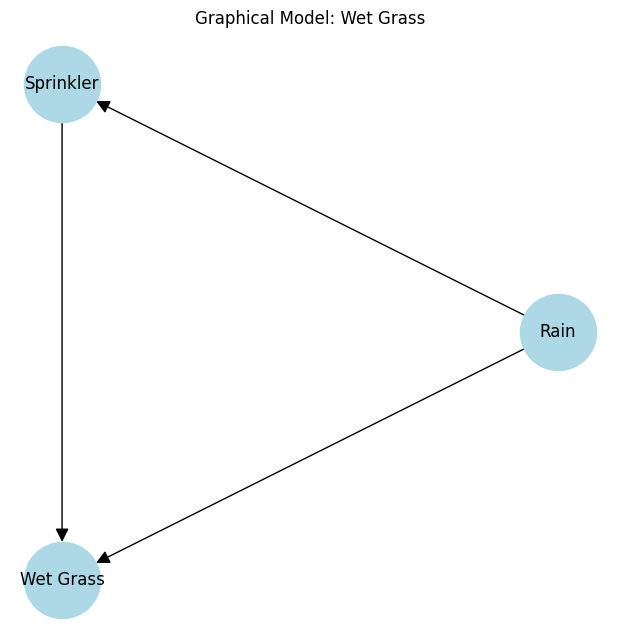

In [ ]:
import networkx as nx

# 1. Initialize Directed Graph
G = nx.DiGraph()

# 2. Add Nodes
G.add_node("Rain")
G.add_node("Sprinkler")
G.add_node("Wet Grass")

# 3. Add Edges (Causal links)
G.add_edge("Rain", "Wet Grass")
G.add_edge("Sprinkler", "Wet Grass")
G.add_edge("Rain", "Sprinkler")

# 4. Draw
pos = nx.circular_layout(G)
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, arrowsize=20)
plt.title("Graphical Model: Wet Grass")
plt.show()

## Task 6:

Draw a graph for a "Health Study."

- Nodes: Diet, Exercise, Heart Health.

- Edges:

  - Diet affects Heart Health.

  - Exercise affects Heart Health.

  - Diet affects Exercise (Maybe better diet gives you energy to run?).

- Generate the plot.

In [ ]:
#WRITE CODE HERE

## **7. Model Selection**

How do we choose the right one? Generalization and Validation

**7.1 The Bias-Variance Tradeoff**

**Underfitting (High Bias):** The model is too simple (e.g., fitting a straight line to a parabola). It cannot capture the pattern.

**Overfitting (High Variance):** The model is too complex. It connects every single data point, capturing noise rather than signal.

We seek the "Goldilocks" zone in the middle.

**7.2 Cross-Validation**

We cannot judge a model's performance on the training data (due to overfitting risk). We need fresh data. Since data is expensive, we simulate fresh data using Cross-Validation.
1. Split data into $K$ folds.
2. Train on $K-1$ folds.
3. Test on the held-out fold.
4. Rotate and repeat $K$ times.
5. Average the results.

This gives a robust estimate of generalization error.


**7.3 Bayes Factors and Occam's Razor**

Bayesian Model Selection offers a mathematically elegant solution called Automatic Occam's Razor. When comparing models using the Bayes Factor (ratio of marginal likelihoods), complex models are automatically penalized.

A complex model spreads its probability mass over a huge variety of datasets. A simple model concentrates its mass on specific datasets. If the simple model can explain the data, its probability density at that point will be higher than the spread-out density of the complex model.

**Implementation : K-Fold Cross-Validation**

We will implement a simple validation loop to choose between a Linear Model (Degree 1) and a Polynomial Model (Degree 2).


Imagine you are hiring a translator. You give them a test text (Training Data). They translate it perfectly. But did they memorize the dictionary, or do they know the language?
To test this, you define 5 different texts.
- You let them study 4, and test them on the 5th (Validation).
- You repeat this for all combinations.

If they consistently perform well on the unseen text, they are a good model.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Generate Non-Linear Data (Parabola)
# y = 0.5 * x^2 + noise
X = np.random.rand(20, 1) * 10 - 5 # Random x between -5 and 5
y = 0.5 * X**2 + np.random.randn(20, 1) # Quadratic relation

# 2. Define K-Fold Splitter (K=4)
kf = KFold(n_splits=4)

linear_errors = []
poly_errors = []

# 3. Cross-Validation Loop
for train_index, val_index in kf.split(X):
    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Model A: Linear
    model_lin = LinearRegression()
    model_lin.fit(X_train, y_train)
    pred_lin = model_lin.predict(X_val)
    error_lin = np.mean((y_val - pred_lin)**2)
    linear_errors.append(error_lin)

    # Model B: Quadratic (Polynomial Degree 2)
    model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_val)
    error_poly = np.mean((y_val - pred_poly)**2)
    poly_errors.append(error_poly)

print(f"Average Linear Error: {np.mean(linear_errors):.2f}")
print(f"Average Poly Error:   {np.mean(poly_errors):.2f}")
# The Poly Error should be significantly lower.

Average Linear Error: 13.93
Average Poly Error:   1.16


#Task 7

Perform a simple Train/Test split manually on the "Car" dataset (from Part 1, assuming you have 4 cars).

1. Split indices: Train on indices , Test on .

2. Train a Linear Regression model on the Train set to predict 'Top Speed' from 'Horsepower'.

3. Predict on the Test set.

4. Calculate and print the MSE.

In [ ]:
#write code here